In [131]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Capstone 2: Unsupervised Learning

## Classifying and clustering popular stars of the 1980's
#### Marnie Boyer

<img src="80s.png" alt="80s music" style="width: 600px;"/>

#### Project description

For this project, I selected a corpus of popular songs from thirteen popular 80's artists (note, these artists were stars in the 80's but the songs are sourced from their lifetime of work).  I was able to curate the lyrics and audio features for between 70 to 150 songs for each artist. The lyrics were sourced from Kaggle while the audio features were acquired through the Spotify API (via the SpotiPy Python package: https://github.com/plamere/spotipy).  

The SpotiPy package simplifies the Spotify API. I registered for a Spotify token and searched for each artist. I extracted the albums for each artist and from there, looped through the API to gather each track and its audio features. 

The audio features measured attributes such as the song's danceability, energy, loudness, speechiness, acoustic, instrumental, liveness, valence, and tempo.  These features represent an important dimension to music which is intrepreted by the listener not only by the words in the song but also how it sounds. 

I began by cleaning the data and matching the Kaggle lyric data set against the Spotify audio features data set. Because the dataset with the lyrics and the audio feature data were acquired from different sources, there were differences in the formats of the text on which to join the tracks.  For example, in Spotify, the tracks were often identified by a their version (live, remastered, original, etc). Therefore, when matching to the Kaggle lyrics data set, many songs were dropped in the track name matching inadvertently. I cleaned up the Spotify dataset with reg ex expressions and reducing everything to lower case.  It was also necessary to match on both track name and artist as some song titles were duplicated among the artists.  Even after the cleaning of the data, some songs in the original data set were lost as they did not appear in both datasets. However, I was able to retain over 1200 songs.  

For the thirteen artists I chose, the Kaggle data set had over 2,200 songs.  In Spotify, those artists had over 4,000 songs (note, there were duplicates of the same track with different versions).  The resulting data set was 1462 matched songs with lyrics and audio features.

In [170]:
print('Number of songs - Kaggle lyrics dataset: ' + str(result.shape[0])    ) #Kaggle lyrics songs
print('Number of songs from Spotify: ' + str(spotify.shape[0]))    #Spotify
print('Number of songs when Kaggle & Spotify are combined: ' + str(result_spotify.shape[0])  ) # Combined

Number of songs - Kaggle lyrics dataset: 2236
Number of songs from Spotify: 4077
Number of songs when Kaggle & Spotify are combined: 1462


### Feature Selection, Clustering and Classification

I cleaned and tokenized the song lyrics to create new features using the bag of words approach. I chose the top 50 words per song (songs were generally between 90 and 300 words) and the top unique words across all songs.  The top 50 words in each of over 1400 songs resulted in only 168 unique words! This indicates how much overlap there is among the most common words. This wordcloud illustrates the top 100 words.   

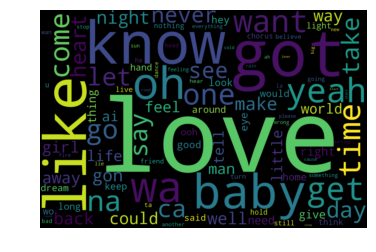

In [276]:
wordcloud = WordCloud(width=1500,height=1000, max_words=100,relative_scaling=1,normalize_plurals=True).generate_from_frequencies(frequencies = d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Together with the bag of words features and the Spotify features, I added a few simple text statistics - number of total words in the song, number of unique words in the song and the percentage of words that are unique.  This could indicate how much of the song is the chorus or refrain. 



I normalized the BOW + Spotify data set and performed PCA with 120 features. I tested PCA with various feature counts with little impact on the results.

I attempted several clustering techniques, such as K-means, Mean-Shift and Spectral Clustering. Even with PCA to reduce the number of features and multiple attempts to generate new features, I was not able to create a clustering algorithm that was much better than random in terms of aligning the clusters with the artists.  The Adjusted Rand Index was almost 0 and the randomness was clear upon observation of the songs with their assigned clusters.  The silhouette scores, which indicate how similar the clusters are, were between 20 and 40%, depending on the number of clusters.  This tells me that while the clusters cannot align with the artists well, the model was able to pick up other similarities among the clusters. The clusters were stable between the test and training set - evidenced by similar silhouette scores for each number of clusters selected.

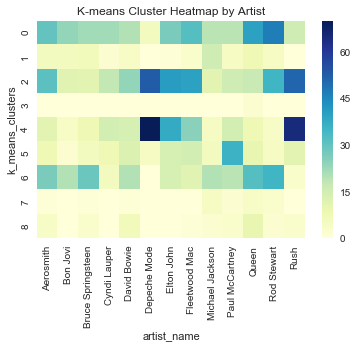

In [171]:
make_heatmap()

I next developed a classification model for the artists utilizing the bag of words and Spotify data.  I built the classification models with and without the Spotify API data, and concluded that inclusion of the audio features improved the performance of the models.  The text statistics, such as number of words, number of unique words and the percent thereof, also improved the classification models.  I applied several classification models, such as Random Forest Classification, Logistic Regression and Gradient Boosting. The best performance model was the Gradient Boosting model. The model still overfits the data with a 99% accuracy for the training set and 35% for the test set, however 35% is not terrible when selecting between 13 artists.  This model had some highlights in its predictive power in that it can best predict Rush (best), Depeche Mode, and Bruce Springsteen.  The model was very poor at predicting Cyndi Lauper.  Among all of the artists, Depeche Mode songs have the lowest Valence which is defined as musical positiveness. Depeche Mode songs sound the most sad, depressed and angry and likely have words that also reflect this sentiment.  My model may be picking up on this extreme negativeness of their music and able to distinguish it more easily from the other artists. Similarly, Rush has the lowest danceability and the model performs well with identifying Rush songs.

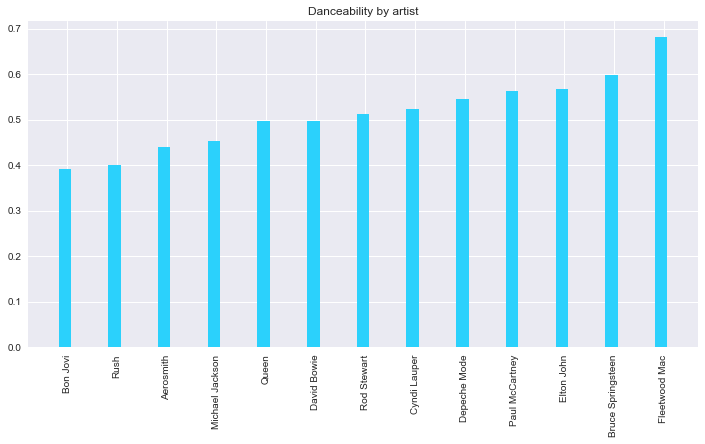

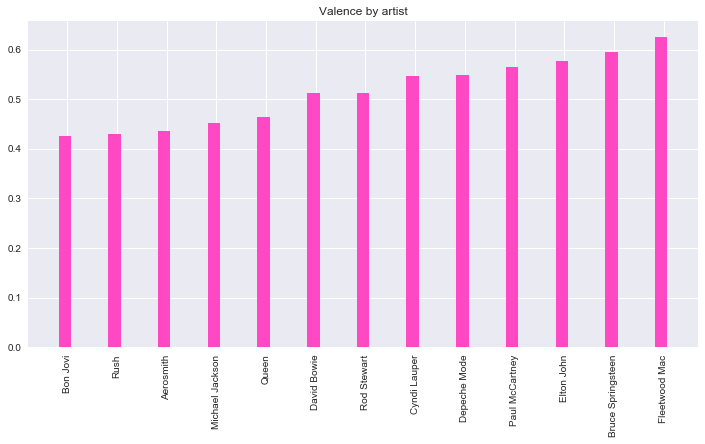

In [166]:
dance_graph()
valence_graph()

In [282]:
print('% correct responses in BOW gradient boosting test set: ' + str(all_correct/table_test.loc['All','All']*100)+ '%')
gb_df.sort_values('gb_pct_correct',ascending = False)

% correct responses in BOW gradient boosting test set: 33.606557377%


,artist,gb_correct,gb_total,gb_pct_correct
4,Rush,21,36,58.0
9,Depeche Mode,20,37,54.0
6,Bruce Springsteen,11,22,50.0
5,Elton John,12,29,41.0
12,Queen,13,37,35.0
2,Rod Stewart,10,30,33.0
7,Aerosmith,10,32,31.0
1,Fleetwood Mac,7,28,25.0
3,Michael Jackson,6,25,24.0
11,David Bowie,5,22,23.0


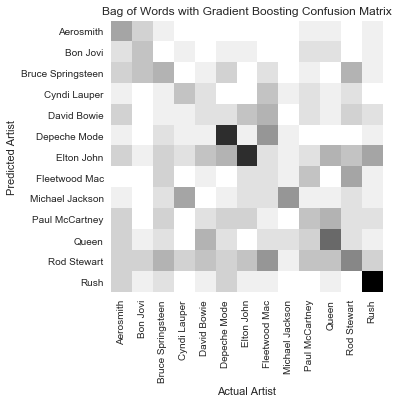

In [218]:
BOW_GB_heatmap()

Next, I utilized the TF-IDF approach to feature generation which I thought would enhance the result over the bag of words approach because many words (that were not stop words) are used in almost every song by every artist.  In fact, the most common word for 8 out of the 13 artists' songs was 'love'. Rod Stewart used the word 'love' the most of any artist. 

TF-IDF would penalize those words for their frequency and help decipher other trends among more unique words.  The TF-IDF vectorizer generated over 13K features which I reduced using SVD down to 1600 after testing 100 variable increments to capture the most variance with the least number of features.  

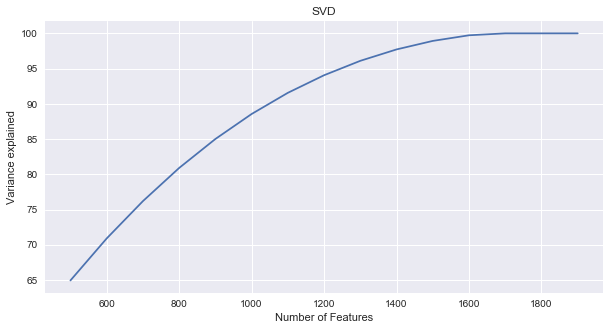

In [223]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(number_of_variables,variance_exp)
plt.title('SVD')
ax.set_ylabel('Variance explained')
ax.set_xlabel('Number of Features')

plt.show()

After attempting several classification modeling approaches, the best performing model was the Support Vector Machines model which had a 32% accuracy score against the test data set.  While this was slightly worse than the gradient boosting bag of words model, the SVM was more accurate for more of the artists and the range from worst to best was smaller for the TF IDF model. In fact, Cyndi Lauper, for which the BOW model was < 5% accurate, the TF-IDF SVM model was able to accurately predict Cyndi Lauper's songs over 20% of the time. See the table below for the comparison of the gradient boosting and support vector models.

% correct responses in test set (tf-idf svm model): 32.5581395349%


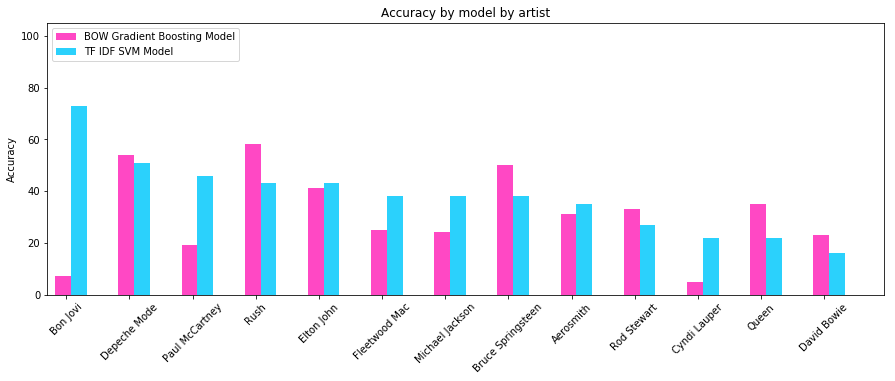

In [284]:
print('% correct responses in test set (tf-idf svm model): ' + str(svm_all_correct/svm_table_test.loc['All','All']*100)+ '%')

model_compare_graph()

#### This visualization of the confusion matric shows a strong signal along the diagonal.

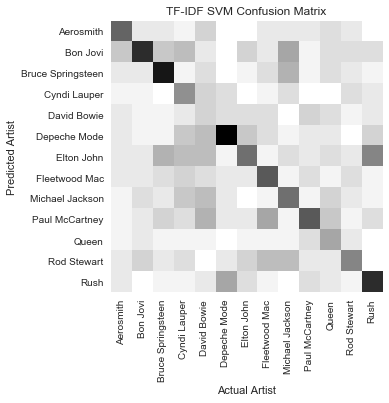

In [225]:
TFIDF_SVM_heatmap()

Clustering was not an effective way for classifying the artists.  Modeling worked better, especially with TF-IDF using Support Vector Machines.  An advantage of clustering would be that it would detect interesting similarities among the artists. As we know, artists not only sing a variety of songs - some upbeat, others melancholy, it is also very likely that an artist did not write the words of their song.  Clustering could identify lyrical and audio similarities that cross the barrier of which artist actually recorded a song.  However, if the task is to determine which artist recorded the song, the classification models perform the strongest and therefore would be the most useful for this task.

Music is a rich area for predictive modeling and data science in general.  Spotify and similar companies utilize many of these techniques to determine what songs users may also want to listen to in addition to what is in their playlist. Music discovery is a key feature for music services.  Much academic work has been done to predict artists like I have done here, as well as genres.


For further reading, please see these links:

1. http://www.ifs.tuwien.ac.at/~neumayer/pubs/NEU07_ecir.pdf - Integration of text and audio features for genre classification
2. http://www.aclweb.org/anthology/C14-1059 - Lyric based classification of music
3. https://nlp.stanford.edu/courses/cs224n/2006/fp/sadovsky-x1n9-1-224n_final_report.pdf Song artist and genre classification via supervised learning with lyrics

## ------------------------------------------------------- END OF REPORT----------------------------------------------------

In [2]:
import nltk
#nltk.download()

In [79]:
from textstat.textstat import textstat
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import re
from collections import Counter
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from gensim.models import doc2vec
from collections import namedtuple
from nltk.corpus import stopwords
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import SpectralClustering
from os import path
from wordcloud import WordCloud
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix


In [4]:
# Function for standard text cleaning.
def text_cleaner(text):
    text = re.sub(r'--',' ',text)
    text = re.sub("[\[].*?:-[\]]", "", text)
    text = ' '.join(text.split())
    return text

In [5]:
# get song data from Kaggle dataset
songs = pd.read_csv('C:/Users/boyerm/Documents/Thinkful/songdata.csv')

In [6]:
songs.head()

,artist,song,link,text
0,ABBA,Ahe's My Kind Of Girl,/a/abba/ahes+my+kind+of+girl_20598417.html,"Look at her face, it's a wonderful face \nAnd..."
1,ABBA,"Andante, Andante",/a/abba/andante+andante_20002708.html,"Take it easy with me, please \nTouch me gentl..."
2,ABBA,As Good As New,/a/abba/as+good+as+new_20003033.html,I'll never know why I had to go \nWhy I had t...
3,ABBA,Bang,/a/abba/bang_20598415.html,Making somebody happy is a question of give an...
4,ABBA,Bang-A-Boomerang,/a/abba/bang+a+boomerang_20002668.html,Making somebody happy is a question of give an...


### For this project, I have decided to focus on top 80's artists

In [7]:
eighties_artists = pd.DataFrame(columns= ['artist'])

In [8]:
artists80 = ['Bon Jovi','Fleetwood Mac','Rod Stewart','Michael Jackson','Rush','Elton John','Bruce Springsteen',
             'Aerosmith','Paul McCartney','Depeche Mode','Cyndi Lauper', 'David Bowie','Queen']

eighties_artists['artist'] = artists80

In [9]:
eighties_songs = pd.merge(eighties_artists, songs, on='artist', how='inner')

In [10]:
# how many songs from each 80's artist?
songs_per_artist80 = eighties_songs.groupby('artist').count().sort_values(by = 'song', ascending = False)
print(songs_per_artist80)

                   song  link  text
artist                             
Bon Jovi            181   181   181
Fleetwood Mac       180   180   180
Rod Stewart         178   178   178
Michael Jackson     176   176   176
Bruce Springsteen   175   175   175
Elton John          175   175   175
Rush                175   175   175
Aerosmith           171   171   171
Paul McCartney      169   169   169
Depeche Mode        167   167   167
David Bowie         165   165   165
Queen               163   163   163
Cyndi Lauper        161   161   161


In [11]:
#shuffle the order
eighties_songs = eighties_songs.sample(frac=1).reset_index(drop=True)

In [12]:
# make lists with the text and features
artist_name = []
clean_text = []
twords = []
track_name = []


for i in range(0,eighties_songs.shape[0]):  
    z = eighties_songs.artist[i]
    artist_name.append(z)
    
    y =eighties_songs.song[i]
    track_name.append(y)
    
    x = eighties_songs.text[i]
    clean = text_cleaner(x)
    clean_text.append(clean)    
    
    token_words = nltk.word_tokenize(clean)
    twords.append(token_words)


In [13]:
# add features to songs dataframe 
mysongs = pd.DataFrame()
mysongs['artist_name'] = artist_name
mysongs['clean_text'] = clean_text
mysongs['tokens'] = twords
mysongs['track_name']= track_name

In [14]:
mysongs.head()

,artist_name,clean_text,tokens,track_name
0,Aerosmith,When winter hush turns summer pink In half the...,"[When, winter, hush, turns, summer, pink, In, ...",Girls Of Summer
1,David Bowie,"Hello, Is there anybody in there Just nod if y...","[Hello, ,, Is, there, anybody, in, there, Just...",Comfortably Numb
2,Rush,There is a lake between sun and moon Not too m...,"[There, is, a, lake, between, sun, and, moon, ...",Between Sun And Moon
3,Bruce Springsteen,We took the highway till the road went black W...,"[We, took, the, highway, till, the, road, went...",Last To Die
4,Elton John,If you want a lover I'll do anything you ask m...,"[If, you, want, a, lover, I, 'll, do, anything...",I'm Your Man


In [15]:
num_words = []
for i in range(0,mysongs.shape[0]):
    # Add song length as a new feature
    numw = len(mysongs.tokens[i])
    num_words.append(numw)
    
mysongs['num_words'] = num_words

In [16]:
unique_words = []
for i in range(0,mysongs.shape[0]):
    # Add unique words as a new feature
    unw = len(set(mysongs.tokens[i]))
    unique_words.append(unw)
    
mysongs['un_words'] = unique_words


In [17]:
mysongs['percent_unique_words'] = mysongs['un_words']/mysongs['num_words'] 

In [18]:
mysongs.head()

,artist_name,clean_text,tokens,track_name,num_words,un_words,percent_unique_words
0,Aerosmith,When winter hush turns summer pink In half the...,"[When, winter, hush, turns, summer, pink, In, ...",Girls Of Summer,304,136,0.447368
1,David Bowie,"Hello, Is there anybody in there Just nod if y...","[Hello, ,, Is, there, anybody, in, there, Just...",Comfortably Numb,272,138,0.507353
2,Rush,There is a lake between sun and moon Not too m...,"[There, is, a, lake, between, sun, and, moon, ...",Between Sun And Moon,209,76,0.363636
3,Bruce Springsteen,We took the highway till the road went black W...,"[We, took, the, highway, till, the, road, went...",Last To Die,250,125,0.500000
4,Elton John,If you want a lover I'll do anything you ask m...,"[If, you, want, a, lover, I, 'll, do, anything...",I'm Your Man,291,124,0.426117


In [19]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

In [20]:
# this picks the most common words in each speech:
allwords = []
def bag_of_words(text):
    
    # Filter out punctuation and stop words.
    for word in text:
        word = word.lower()
        word = wordnet_lemmatizer.lemmatize(word)
        if word.isalnum() == True:
            if word not in stopwords.words('english'):
                allwords.append(word)
            else:
                continue
        else:
            continue
            
    # Return the most common words.
    return [item[0] for item in Counter(allwords).most_common(50)]
    

In [21]:
# this goes through the whole song list in the dataframe to find the BOW
all_common_words = []

for i in range(0,mysongs.shape[0]):
    z = bag_of_words(mysongs.tokens[i])
    all_common_words.append(z)
    z = []
    
# Can flatten list of lists    [[word, word],[word,word]]  ~  sum(list_of_lists, [])

In [22]:
# this finds the common words among all songs top words:

cw=[]

for i in range(0,mysongs.shape[0]):
    for word in all_common_words[i]:
        if word not in cw:
            cw.append(word)
        else:
            continue

In [23]:
print(len(cw))  # of unique words

184


In [24]:
print(cw)

['girl', 'yeah', 'love', 'summer', 'ca', 'let', 'fly', 'live', 'without', 'born', 'make', 'cry', 'think', 'day', 'inside', 'oh', 'know', 'everybody', 'talking', 'thing', 'winter', 'hush', 'turn', 'pink', 'half', 'time', 'take', 'blink', 'depends', 'choo', 'long', 'pretty', 'face', 'song', 'thought', 'like', 'go', 'wrong', 'favorite', 'drive', 'wild', 'city', 'walk', 'country', 'mile', 'boy', 'god', 'bless', 'child', 'climbin', 'hear', 'pain', 'wa', 'caught', 'got', 'come', 'feeling', 'show', 'receding', 'distant', 'ship', 'smoke', 'horizon', 'coming', 'wave', 'lip', 'move', 'saying', 'become', 'comfortably', 'numb', 'little', 'gone', 'ahh', 'yes', 'sun', 'fine', 'need', 'wonder', 'place', 'space', 'bonfire', 'light', 'sky', 'doubt', 'fact', 'last', 'die', 'mistake', 'whose', 'break', 'blood', 'heart', 'want', 'man', 'baby', 'fall', 'moon', 'fascination', 'every', 'use', 'part', 'circus', 'lost', 'carousel', 'still', 'anything', 'would', 'wide', 'open', 'used', 'stand', 'away', 'look', 

In [25]:
# Ok, now i Have a list of the most common words (unique across all songs). So I want to construct a dataframe that 
# counts how many times the word appears in the song

In [26]:
wordcount = pd.DataFrame(columns=cw)
wordcount['song_lyrics'] = mysongs.clean_text
wordcount.loc[:, cw] = 0

list_of_words = []
for i in range(0,mysongs.shape[0]):
    
    for word in mysongs.tokens[i]:
        word = word.lower()
        word = wordnet_lemmatizer.lemmatize(word)
        if word.isalnum() == True:
            if word not in stopwords.words('english'):      
                if word in cw:
                    list_of_words.append(word)

                  
    # Populate the row with word counts.
    for w in list_of_words:
        wordcount.loc[i, w] += 1
    
    # reset list again
    list_of_words = []

In [27]:
word_sum = pd.DataFrame()
a = wordcount.sum()
word_sum['wordcount'] = a

word_sum = word_sum.drop(word_sum.index[len(word_sum)-1])

word_sum['wordcount'] = word_sum['wordcount'].astype(str).astype(int)

word_sum['word']=word_sum.index
word_sum = word_sum.reset_index(drop=True)

word_sum.sort_values(['wordcount'], ascending=[False])

,wordcount,word
2,4166,love
54,2647,got
16,2426,know
35,2398,like
95,2217,baby
15,2089,oh
52,2032,wa
1,2015,yeah
138,1955,get
93,1886,want


In [28]:
d = {}
for a, x in word_sum.values:
    d[x] = a

In [29]:
d

{'ahh': 18,
 'ai': 953,
 'alone': 436,
 'anything': 196,
 'around': 718,
 'away': 1103,
 'baby': 2217,
 'back': 1154,
 'beat': 235,
 'become': 31,
 'bless': 19,
 'blink': 7,
 'blood': 161,
 'bogey': 49,
 'bonfire': 4,
 'born': 178,
 'boy': 524,
 'break': 270,
 'ca': 1456,
 'care': 311,
 'carousel': 11,
 'caught': 57,
 'child': 251,
 'choo': 1,
 'chorus': 551,
 'christmas': 139,
 'circus': 21,
 'city': 221,
 'climbin': 1,
 'come': 1667,
 'comfortably': 2,
 'coming': 278,
 'could': 1133,
 'country': 56,
 'cry': 450,
 'day': 1352,
 'de': 86,
 'delicious': 17,
 'depends': 4,
 'diddy': 12,
 'die': 231,
 'distant': 24,
 'doubt': 77,
 'dream': 703,
 'drive': 121,
 'ever': 487,
 'every': 669,
 'everybody': 354,
 'everything': 365,
 'eye': 788,
 'face': 421,
 'fact': 53,
 'fall': 393,
 'fascination': 15,
 'father': 124,
 'favorite': 19,
 'feel': 1036,
 'feeling': 352,
 'find': 520,
 'fine': 188,
 'fire': 349,
 'fly': 270,
 'get': 1955,
 'girl': 1072,
 'give': 865,
 'go': 1631,
 'god': 360,
 'go

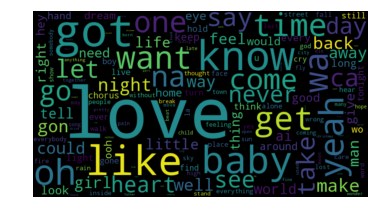

In [30]:

wordcloud = WordCloud(width=900,height=500, max_words=160,relative_scaling=1,normalize_plurals=True).generate_from_frequencies(frequencies = d)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [31]:
# Need to make my BOWs into integers
change_me = list(wordcount.columns)
change_me = change_me[:-1]
wordcount[change_me] = wordcount[change_me].astype(str).astype(int)

In [32]:
wordcount.head()

,girl,yeah,love,summer,ca,let,fly,live,without,born,...,tonight,beat,somebody,find,dream,world,eye,chorus,ooh,song_lyrics
0,19,9,5,4,4,3,3,3,3,3,...,0,0,0,0,0,0,0,0,0,When winter hush turns summer pink In half the...
1,0,0,0,0,3,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,"Hello, Is there anybody in there Just nod if y..."
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,There is a lake between sun and moon Not too m...
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,We took the highway till the road went black W...
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,If you want a lover I'll do anything you ask m...


In [33]:
result = pd.concat([wordcount, mysongs], axis=1)

In [34]:
result.head()

,girl,yeah,love,summer,ca,let,fly,live,without,born,...,chorus,ooh,song_lyrics,artist_name,clean_text,tokens,track_name,num_words,un_words,percent_unique_words
0,19,9,5,4,4,3,3,3,3,3,...,0,0,When winter hush turns summer pink In half the...,Aerosmith,When winter hush turns summer pink In half the...,"[When, winter, hush, turns, summer, pink, In, ...",Girls Of Summer,304,136,0.447368
1,0,0,0,0,3,0,0,0,0,0,...,0,0,"Hello, Is there anybody in there Just nod if y...",David Bowie,"Hello, Is there anybody in there Just nod if y...","[Hello, ,, Is, there, anybody, in, there, Just...",Comfortably Numb,272,138,0.507353
2,0,0,1,0,0,0,0,0,0,0,...,0,0,There is a lake between sun and moon Not too m...,Rush,There is a lake between sun and moon Not too m...,"[There, is, a, lake, between, sun, and, moon, ...",Between Sun And Moon,209,76,0.363636
3,0,0,0,0,0,0,0,0,0,0,...,1,0,We took the highway till the road went black W...,Bruce Springsteen,We took the highway till the road went black W...,"[We, took, the, highway, till, the, road, went...",Last To Die,250,125,0.500000
4,0,0,1,0,0,0,0,0,0,0,...,0,0,If you want a lover I'll do anything you ask m...,Elton John,If you want a lover I'll do anything you ask m...,"[If, you, want, a, lover, I, 'll, do, anything...",I'm Your Man,291,124,0.426117


In [35]:
# add spotipy features

In [36]:
spotify = pd.read_csv('spotify.csv')

In [37]:
spotify = spotify.dropna()

In [38]:
result_spotify =  pd.merge(result,spotify, left_on = ['track_name','artist_name'], right_on =['name_clean','artist_rep'], how='inner')

In [39]:
result_spotify.head()

,girl,yeah,love,summer,ca,let,fly,live,without,born,...,liveness,loudness,mode,speechiness,tempo,time_signature,track_href,type,valence,name_clean
0,0,0,1,0,0,0,0,0,0,0,...,0.9650,-5.510,1,0.0387,121.446,4.0,https://api.spotify.com/v1/tracks/1DHBNGZni4YR...,audio_features,0.402,Between Sun And Moon
1,0,0,0,0,0,0,0,0,0,0,...,0.3270,-5.138,0,0.0450,145.176,4.0,https://api.spotify.com/v1/tracks/0M9vtXoG7lct...,audio_features,0.642,Last To Die
2,0,2,0,0,3,0,0,2,0,0,...,0.0780,-9.238,1,0.1480,108.197,4.0,https://api.spotify.com/v1/tracks/1ipVdOvDm2Pr...,audio_features,0.554,Fascination
3,7,0,1,0,1,0,0,0,0,0,...,0.1490,-7.530,0,0.1090,159.225,4.0,https://api.spotify.com/v1/tracks/3bs1ntMTAOeq...,audio_features,0.577,Carousel
4,0,0,2,0,2,0,0,0,0,0,...,0.0471,-9.430,1,0.0564,93.355,4.0,https://api.spotify.com/v1/tracks/06TRpxWKd98V...,audio_features,0.775,Easier To Walk Away


,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,artist
0,0.077670,0.440471,291109.985294,0.816324,0.023179,5.529412,0.218975,-5.159074,0.691176,0.053313,122.842338,3.926471,0.429484,Bon Jovi
1,0.061861,0.392537,309808.382550,0.851223,0.082459,5.516779,0.568840,-6.730161,0.691275,0.081007,123.784893,3.926174,0.452551,Rush
2,0.086501,0.400261,265069.110169,0.819638,0.030525,5.423729,0.389564,-7.084492,0.771186,0.059703,125.342051,3.966102,0.464406,Aerosmith
3,0.267111,0.682667,253887.964286,0.660226,0.036299,5.761905,0.188313,-7.745667,0.666667,0.067443,114.071917,3.988095,0.595251,Michael Jackson
4,0.230482,0.454481,232980.007634,0.651427,0.011915,4.961832,0.348961,-9.487664,0.809160,0.077931,116.878267,3.877863,0.426609,Queen
5,0.185637,0.512602,250288.631068,0.682631,0.057747,5.854369,0.324556,-9.619262,0.728155,0.063970,126.056165,3.941748,0.549490,David Bowie
6,0.363126,0.524169,247119.227941,0.590934,0.026432,4.852941,0.215337,-9.641500,0.786765,0.040271,118.495132,3.904412,0.513263,Rod Stewart
7,0.318610,0.598930,250890.690141,0.576392,0.010604,5.239437,0.260308,-9.915042,0.816901,0.061851,119.191690,3.929577,0.545831,Cyndi Lauper
8,0.231407,0.562577,287957.883212,0.681752,0.198780,5.160584,0.402353,-10.038336,0.503650,0.047009,121.565912,3.897810,0.436185,Depeche Mode
9,0.278060,0.498287,212457.756522,0.605154,0.057721,4.939130,0.452991,-10.149870,0.721739,0.047521,122.352365,3.895652,0.564586,Paul McCartney


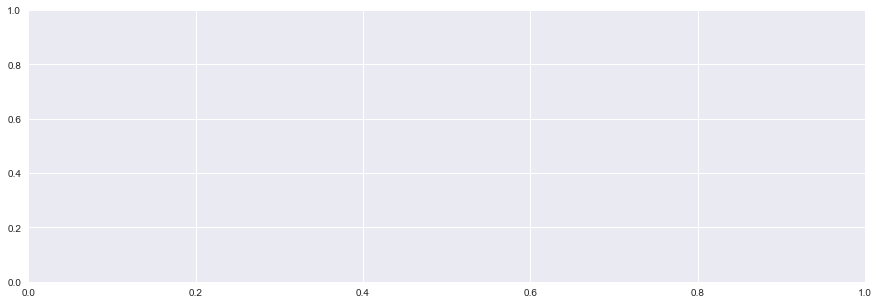

In [99]:
artist_avg =  result_spotify[['artist_rep','acousticness','analysis_url','danceability','duration_ms','energy','id','instrumentalness','key',
                  'liveness','loudness','mode','speechiness','tempo','time_signature','track_href','type','uri','valence']]
artist_avg = artist_avg.groupby('artist_rep').mean().sort_values(by = 'loudness', ascending = False)
artist_avg['artist']=artist_avg.index
fig, ax = plt.subplots(figsize=(15,5))
artist_avg = artist_avg.reset_index(drop=True)
artist_avg

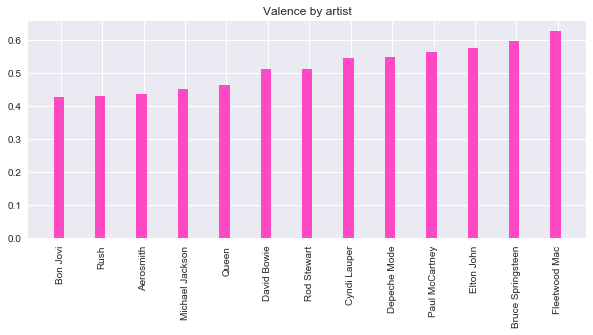

In [172]:
def valence_graph():
    fig, ax = plt.subplots(figsize=(10,4)) 
    width = 0.25
    pos = list(range(len(artist_avg['valence']))) 
    
    v = artist_avg.sort_values('valence')
    plt.bar(pos, v['valence'], width, color='#ff48c4', label=v['artist'][0]) 
    ax.set_title('Valence by artist')

    ax.set_xticks([p +  width/5 for p in pos])
    plt.xticks(rotation=90)
    ax.set_xticklabels(artist_avg['artist'])
    plt.show()
    
valence_graph()

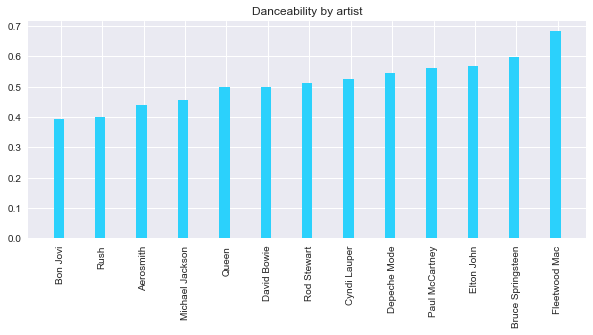

In [173]:
def dance_graph():
    fig, ax = plt.subplots(figsize=(10,4)) 
    d = artist_avg.sort_values('danceability')
    plt.bar(pos, d['danceability'], width, color='#2bd1fc', label=d['artist'][0]) 
    #ax.set_ylabel('db')
    ax.set_title('Danceability by artist')

    ax.set_xticks([p +  width/5 for p in pos])
    plt.xticks(rotation=90)
    ax.set_xticklabels(artist_avg['artist'])
    plt.show()
    
dance_graph()

In [45]:
# how many songs from each 80's artist?
songs_per_artist_spotify = result_spotify.groupby('artist_rep').count().sort_values(by = 'track_name', ascending = False)
print(songs_per_artist_spotify)

                   girl  yeah  love  summer   ca  let  fly  live  without  \
artist_rep                                                                  
Rush                149   149   149     149  149  149  149   149      149   
Depeche Mode        137   137   137     137  137  137  137   137      137   
Rod Stewart         136   136   136     136  136  136  136   136      136   
Elton John          135   135   135     135  135  135  135   135      135   
Queen               131   131   131     131  131  131  131   131      131   
Fleetwood Mac       128   128   128     128  128  128  128   128      128   
Aerosmith           118   118   118     118  118  118  118   118      118   
Paul McCartney      115   115   115     115  115  115  115   115      115   
David Bowie         103   103   103     103  103  103  103   103      103   
Bruce Springsteen    87    87    87      87   87   87   87    87       87   
Michael Jackson      84    84    84      84   84   84   84    84       84   

In [46]:
print(result_spotify.shape)
print(result.shape)
print(spotify.shape)

(1462, 213)
(2236, 192)
(4077, 21)


In [47]:
# download songs & clusters:
filename = 'result_spotify.csv'
result_spotify.to_csv(filename, index=False, encoding='utf-8')

# CLUSTERING

In [48]:
cX3 = np.array(result_spotify.drop(['name','song_lyrics','tokens','clean_text','artist_name','type','track_href','track_name',
                                    'name_clean','uri','analysis_url','id','artist_rep','key','mode','time_signature',
                                    'instrumentalness','acousticness','liveness'], 1))

X_norm = normalize(cX3)
X_norm = PCA(120).fit_transform(X_norm)

X_train, X_test = train_test_split(X_norm,test_size=0.25,random_state=None)

## K-means (lyrics & spotify data)

In [49]:
from sklearn.cluster import KMeans
from sklearn import metrics
n_clusters = (2,6,8,10,13,15,17,20,25)
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X_train,X_test]:
        model = KMeans(n_clusters=n, random_state=None).fit(sample)
        labels = model.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
0.439189165093
0.468574205539
Number of estimated clusters: 6
0.329180177314
0.311921347295
Number of estimated clusters: 8
0.25945404844
0.28920771307
Number of estimated clusters: 10
0.260025041813
0.269829777837
Number of estimated clusters: 13
0.22452916448
0.239157541691
Number of estimated clusters: 15
0.237803129333
0.241880796923
Number of estimated clusters: 17
0.212639487332
0.230028972395
Number of estimated clusters: 20
0.21919226043
0.22129390034
Number of estimated clusters: 25
0.212460783543
0.212598491527


In [50]:
model = KMeans(n_clusters=9, random_state=None).fit(X_norm)
labels = model.labels_

result_spotify['k_means_clusters'] = labels

# download songs & clusters:
filename = 'k_means_clusters_3.csv'
result_spotify.to_csv(filename, index=False, encoding='utf-8')

result_spotify_avg = result_spotify.groupby(['k_means_clusters'], as_index=False).mean()
print(result_spotify_avg)

filename = 'k_means_cluster_avg.csv'
result_spotify_avg.to_csv(filename, index=False, encoding='utf-8')

   k_means_clusters      girl      yeah      love    summer        ca  \
0                 0  0.450617  0.882716  1.895062  0.030864  0.922840   
1                 1  1.984127  2.412698  2.523810  0.047619  0.698413   
2                 2  0.238889  0.330556  1.294444  0.022222  0.455556   
3                 3  0.000000  6.000000  1.500000  0.000000  0.500000   
4                 4  0.112281  0.238596  1.150877  0.049123  0.410526   
5                 5  0.208633  1.122302  1.223022  0.021583  0.424460   
6                 6  0.691983  1.645570  2.827004  0.037975  0.902954   
7                 7  1.058824  8.588235  7.823529  0.000000  0.647059   
8                 8  0.885714  0.314286  1.514286  0.000000  0.600000   

        let       fly      live   without    ...       energy  \
0  0.888889  0.117284  0.250000  0.172840    ...     0.643444   
1  1.095238  0.333333  0.460317  0.126984    ...     0.786365   
2  0.366667  0.155556  0.130556  0.150000    ...     0.657030   
3  0.5000

In [54]:
print(metrics.adjusted_rand_score(result_spotify.k_means_clusters, result_spotify.artist_name))
clusters = pd.crosstab(result_spotify.k_means_clusters, result_spotify.artist_name, margins=False)
clusters

0.0411095431567


artist_name,Aerosmith,Bon Jovi,Bruce Springsteen,Cyndi Lauper,David Bowie,Depeche Mode,Elton John,Fleetwood Mac,Michael Jackson,Paul McCartney,Queen,Rod Stewart,Rush
k_means_clusters,,,,,,,,,,,,,
0,30,24,22,22,20,6,27,32,19,19,40,47,16
1,6,6,7,2,4,0,1,3,16,5,8,5,0
2,31,12,11,18,24,53,41,40,11,16,17,35,51
3,0,0,0,0,0,0,0,0,0,0,2,0,0
4,11,4,8,15,14,73,38,25,5,15,8,4,65
5,8,2,6,8,13,5,14,15,6,36,10,5,11
6,27,20,29,6,20,0,14,12,20,19,32,35,3
7,1,0,1,0,1,0,0,0,5,2,4,3,0
8,4,0,3,0,7,0,0,1,2,3,10,2,3


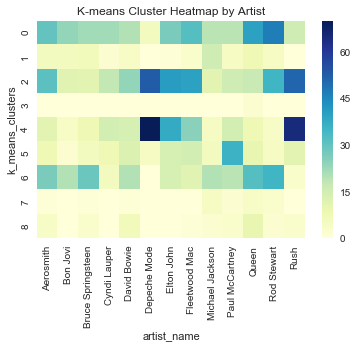

In [169]:
import seaborn as sns
def make_heatmap():
    plt.title('K-means Cluster Heatmap by Artist')
    fposax = sns.heatmap(clusters,vmin=0, vmax=70,annot=False,cmap="YlGnBu")
    plt.show()

make_heatmap()

Based on the ARI score, it is clear that the clustering is not much better than random.

## Mean-shift 

In [70]:
from sklearn.cluster import MeanShift, estimate_bandwidth
for sample in [X_train, X_test]:
    bandwidth = estimate_bandwidth(sample, quantile=0.2, n_samples=500)
    print("bandwidth: {}".format(bandwidth))
    #bandwidth = 0.3
    msmmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    msmmodel.fit(sample)
    labels = msmmodel.labels_
    cluster_centers = msmmodel.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    print("Number of estimated clusters: {}".format(n_clusters_))
    print(metrics.silhouette_score(sample, labels, metric='euclidean'))

bandwidth: 0.00033111852043832594
Number of estimated clusters: 14
0.32877952745
bandwidth: 0.0003498515940384576
Number of estimated clusters: 10
0.360191081903


## Spectral Clustering

In [71]:
n_clusters = (2,3,4,5,10) 
for n in n_clusters:
    print("Number of estimated clusters: {}".format(n))
    for sample in [X_train, X_test]:
        sc = SpectralClustering(n_clusters=n)
        sc.fit(sample)
        predict=sc.fit_predict(sample)
        labels = sc.labels_
        print(metrics.silhouette_score(sample, labels, metric='euclidean'))

Number of estimated clusters: 2
0.439189165093
0.468574205539
Number of estimated clusters: 3
0.32539297893
0.337392167129
Number of estimated clusters: 4
0.24320487095
0.263758334725
Number of estimated clusters: 5
0.132782028128
0.0805324949544
Number of estimated clusters: 10
0.0256166940909
-0.00253631100057


### I really don't like any of my clustering algorithms.  The artists are not clustered together in any of my cluster choices. Spectral and Mean-Shift  put almost all of the songs into the same cluster.   It is not clear how the clusters are differentiated and the ARI score indicates that the clusters are not much better than random at assigning to the correct artist.

# CLASSIFICATION

In [72]:
Y3 = result_spotify['artist_name']
X3 = np.array(result_spotify.drop(['song_lyrics','tokens','clean_text','artist_name','type','track_href','name','track_name','name_clean'
                                  ,'uri','analysis_url','id','artist_rep'], 1))

X3_norm = normalize(X3)

In [73]:
# SPlit for Classification

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3_norm, 
                                                    Y3,
                                                    test_size=0.25,
                                                    random_state=18)


## Classification - BOW - Random Forest

In [74]:
rfc = ensemble.RandomForestClassifier()

train3 = rfc.fit(X_train3, y_train3)
rfc_predicted3 = rfc.predict(X_test3)
print('Training set score:', rfc.score(X_train3, y_train3))
print('Test set score:', rfc.score(X_test3, y_test3))


Training set score: 0.994525547445
Test set score: 0.286885245902


In [75]:
# Lyrics and Spotify Audio Features

pd.crosstab(y_test3, rfc_predicted3)

col_0,Aerosmith,Bon Jovi,Bruce Springsteen,Cyndi Lauper,David Bowie,Depeche Mode,Elton John,Fleetwood Mac,Michael Jackson,Paul McCartney,Queen,Rod Stewart,Rush
artist_name,,,,,,,,,,,,,
Aerosmith,8,6,0,1,4,2,0,1,1,2,0,3,3
Bon Jovi,5,5,0,0,0,0,0,0,1,1,0,2,1
Bruce Springsteen,6,1,3,0,2,1,1,1,0,0,2,3,0
Cyndi Lauper,1,1,2,0,7,4,1,3,0,2,0,2,1
David Bowie,2,0,3,1,3,3,3,2,1,4,1,0,3
Depeche Mode,0,1,2,0,2,20,2,1,0,0,0,2,5
Elton John,3,0,2,2,5,5,9,3,0,2,1,0,5
Fleetwood Mac,3,2,3,1,1,2,5,12,1,3,0,1,0
Michael Jackson,0,3,1,1,5,1,1,0,3,1,0,2,1


## This isn't too bad.  It's interesting to me that the model performs quite well for Depeche mode, Rush and Aerosmith. The model also did relatively well for Bon Jovi and Queen.

In [76]:
# BOW with Logistic Regression

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

train3 = lr.fit(X_train3, y_train3)
lr_predicted3 = lr.predict(X_test3)
print('Training set score:', lr.score(X_train3, y_train3))
print('Test set score:', lr.score(X_test3, y_test3))

Training set score: 0.106751824818
Test set score: 0.0874316939891


Terrible

## BOW with Gradient Boosting

In [77]:
clf = ensemble.GradientBoostingClassifier()

train3 = clf.fit(X_train3, y_train3)
clf_predicted3 = clf.predict(X_test3)
print('Training set score:', clf.score(X_train3, y_train3))
print('Test set score:', clf.score(X_test3, y_test3))

Training set score: 0.98996350365
Test set score: 0.363387978142


In [80]:
print(confusion_matrix(clf_predicted3, y_test3))

[[11  1  1  1  0  0  5  3  0  0  1  2  4]
 [ 2  5  3  1  0  0  0  0  3  0  1  1  0]
 [ 2  0  4  1  1  0  1  2  0  1  1  1  0]
 [ 1  1  0  3  1  0  1  1  0  0  1  1  0]
 [ 2  2  2  0  3  1  0  1  3  2  0  2  0]
 [ 1  0  0  5  2 21  6  3  1  1  0  0  2]
 [ 1  1  3  1  6  6 10  5  0  2  4  3  4]
 [ 0  0  2  2  1  1  1  6  1  4  1  6  0]
 [ 1  1  2  0  0  0  1  1  4  0  2  2  0]
 [ 1  1  2  5  3  0  1  3  2  7  0  1  1]
 [ 0  0  0  0  5  0  2  3  3  1 21  1  0]
 [ 4  1  1  2  1  1  5  4  1  2  3 17  0]
 [ 5  2  0  3  3  5  4  2  1  1  0  0 21]]


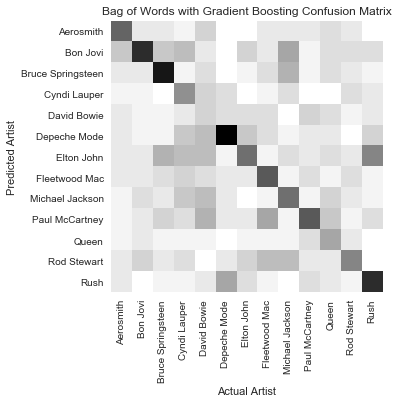

In [222]:
def BOW_GB_heatmap():
    y = eighties_artists['artist'].sort_values()
    fig, ax = plt.subplots(figsize=(10,5))
    plt.imshow(conf, cmap='binary', interpolation='None')
    ax.set_ylabel('Predicted Artist')
    ax.set_xlabel('Actual Artist')
    ax.grid(color='w', linestyle='-', linewidth=0)
    z = model_compare['artist']
    ax.set_xticks(np.arange(len(z)))
    ax.set_yticks(np.arange(len(z)))
    ax.set_xticklabels(y)
    plt.xticks(rotation=90)
    ax.set_yticklabels(y)
    plt.title('Bag of Words with Gradient Boosting Confusion Matrix')

    plt.show()
    
BOW_GB_heatmap()

In [82]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 6,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train3, y_train3)

gb_predict_train = clf.predict(X_train3)
gb_predict_test = clf.predict(X_test3)

print('Test set score:', clf.score(X_test3, y_test3))



Test set score: 0.333333333333


In [84]:
#pd.crosstab(y_test3, clf_predicted3, margins = True)
pd.crosstab(y_test3, gb_predict_test, margins = True)

col_0,Aerosmith,Bon Jovi,Bruce Springsteen,Cyndi Lauper,David Bowie,Depeche Mode,Elton John,Fleetwood Mac,Michael Jackson,Paul McCartney,Queen,Rod Stewart,Rush,All
artist_name,,,,,,,,,,,,,,
Aerosmith,10,2,1,0,3,2,3,0,1,1,2,3,3,31
Bon Jovi,3,1,0,1,2,0,0,1,3,1,0,2,1,15
Bruce Springsteen,2,3,3,0,3,2,2,1,1,1,1,1,0,20
Cyndi Lauper,2,0,1,1,0,5,3,3,0,6,0,1,2,24
David Bowie,0,0,1,0,4,1,1,3,2,3,3,4,4,26
Depeche Mode,0,0,1,0,2,22,5,1,0,1,0,1,2,35
Elton John,4,0,1,1,0,7,12,2,0,0,3,2,5,37
Fleetwood Mac,1,0,2,1,1,4,3,9,1,2,3,5,2,34
Michael Jackson,1,1,0,0,3,2,1,2,4,4,0,1,0,19


In [111]:
# Accuracy tables.
table_test = pd.crosstab(y_test3, gb_predict_test, margins=True)

gb_df = pd.DataFrame(columns = ['artist','gb_correct','gb_total','gb_pct_correct'])
gb_correct = []
gb_total = []
pct_correct = []
all_correct = 0
for artist in artists80:
        artist_correct = table_test.loc[artist,artist]
        gb_correct.append(artist_correct)
        t = table_test.loc[artist,'All']   
        gb_total.append(t)
        all_correct += artist_correct
        a = round(artist_correct/t*100,0)
        pct_correct.append(a)

gb_df['gb_correct'] = gb_correct
gb_df['gb_total']= gb_total
gb_df['artist'] = artists80
gb_df['gb_pct_correct'] = pct_correct
print('% correct responses in BOW gradient boosting test set')
print(all_correct/table_test.loc['All','All']*100)
gb_df.sort_values('gb_pct_correct',ascending = False)

% correct responses in BOW gradient boosting test set
33.3333333333


,artist,gb_correct,gb_total,gb_pct_correct
9,Depeche Mode,22,35,63.0
4,Rush,18,32,56.0
12,Queen,16,35,46.0
2,Rod Stewart,15,37,41.0
8,Paul McCartney,7,21,33.0
5,Elton John,12,37,32.0
7,Aerosmith,10,31,32.0
1,Fleetwood Mac,9,34,26.0
3,Michael Jackson,4,19,21.0
6,Bruce Springsteen,3,20,15.0


In [112]:
table_test

col_0,Aerosmith,Bon Jovi,Bruce Springsteen,Cyndi Lauper,David Bowie,Depeche Mode,Elton John,Fleetwood Mac,Michael Jackson,Paul McCartney,Queen,Rod Stewart,Rush,All
artist_name,,,,,,,,,,,,,,
Aerosmith,10,2,1,0,3,2,3,0,1,1,2,3,3,31
Bon Jovi,3,1,0,1,2,0,0,1,3,1,0,2,1,15
Bruce Springsteen,2,3,3,0,3,2,2,1,1,1,1,1,0,20
Cyndi Lauper,2,0,1,1,0,5,3,3,0,6,0,1,2,24
David Bowie,0,0,1,0,4,1,1,3,2,3,3,4,4,26
Depeche Mode,0,0,1,0,2,22,5,1,0,1,0,1,2,35
Elton John,4,0,1,1,0,7,12,2,0,0,3,2,5,37
Fleetwood Mac,1,0,2,1,1,4,3,9,1,2,3,5,2,34
Michael Jackson,1,1,0,0,3,2,1,2,4,4,0,1,0,19


### Gradient Boosting performed the best.  This model also performed best for Aerosmith, Depeche Mode, Rush, Elton John and Queen. 

# Feature Generation: tf-idf

In [113]:
X = clean_text
Y = artist_name

In [114]:
vectorizer = TfidfVectorizer(max_df=0.4, # drop words that occur in more than half the paragraphs
                             min_df=1, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=True, #convert everything to lower case
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )

In [115]:
X_tfidf=vectorizer.fit_transform(X)

In [116]:
print("Number of features: %d" % X_tfidf.get_shape()[1])

Number of features: 13291


In [117]:
X_train_tfidf, X_test_tfidf= train_test_split(X_tfidf, test_size=0.25, random_state=0)

## Feature selection - tfidf with SVD

In [119]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

#Our SVD data reducer.  We are going to reduce the feature space from 13,291 to ....1330.
trunk = 500

number_of_variables=[]
variance_exp=[]

while trunk < 2000:
    svd= TruncatedSVD(trunk)
    lsa = make_pipeline(svd, Normalizer(copy=False))
    # Run SVD on the training data, then project the training data.
    X_train_lsa = lsa.fit_transform(X_train_tfidf)
    variance_explained=svd.explained_variance_ratio_
    total_variance = variance_explained.sum()
    print("Percent variance captured by all components:",total_variance*100)
    number_of_variables.append(trunk)
    variance_exp.append(total_variance*100)
    trunk += 100

Percent variance captured by all components: 64.9412754743
Percent variance captured by all components: 70.8982957514
Percent variance captured by all components: 76.1950493652
Percent variance captured by all components: 80.901036207
Percent variance captured by all components: 85.0106813337
Percent variance captured by all components: 88.5565501426
Percent variance captured by all components: 91.5623378042
Percent variance captured by all components: 94.0586006939
Percent variance captured by all components: 96.1028781262
Percent variance captured by all components: 97.7196769197
Percent variance captured by all components: 98.9280742742
Percent variance captured by all components: 99.7260913961
Percent variance captured by all components: 100.0
Percent variance captured by all components: 100.0
Percent variance captured by all components: 100.0


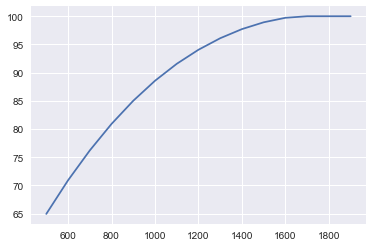

In [120]:
plt.plot(number_of_variables,variance_exp)
plt.show()

In [121]:
# Based on the graph above, I can capture 100% of the variance with around 1600 variables out of 13,300.

trunk = 1600
svd= TruncatedSVD(trunk)
lsa = make_pipeline(svd, Normalizer(copy=False))
X_lsa = lsa.fit_transform(X_tfidf)

In [122]:
lsa_df=pd.DataFrame(X_lsa,index=X)
lsa_dfa = pd.DataFrame(X_lsa)
lsa_df['lyrics']=lsa_df.index
lsa_df = lsa_df.reset_index(drop=True)

In [123]:
# I want to add the data back to my df with tf-idf
lsa_df2 =  pd.merge(lsa_df,mysongs, left_on ='lyrics', right_on =['clean_text'], how='inner')
lsa_df2a = lsa_df2.drop(['clean_text','artist_name','track_name','lyrics','tokens'], 1)

In [124]:
# Add spotify audio features
lsa_df3 =  pd.merge(lsa_df2,spotify, left_on = ['track_name','artist_name'], right_on =['name_clean','artist_rep'], how='inner')

#lsa_df4 = lsa_df3.drop(['clean_text','artist_name','type','track_href','name','track_name','name_clean','lyrics','tokens'
                               #   ,'uri','analysis_url','id','artist_rep','mode','key','time_signature'], 1)



In [125]:
#cX3 = np.array(lsa_df4)
cX3 = np.array(lsa_dfa)
#X_norm = normalize(cX3)
X_train, X_test = train_test_split(X_norm, test_size=0.25, random_state=0)

In [126]:
# Clustering with tf-idf was unsatisfactory

# Classification (TF-IDF)

In [128]:
# TF-IDF for lyrics
X = lsa_df2.drop(['lyrics','artist_name','clean_text','tokens','track_name','num_words'],axis = 1)


Y = lsa_df2['artist_name']

# TF IDF + Spotify audio features
X3 = lsa_df3.drop(['lyrics','artist_name','clean_text','tokens','track_name'
                 ,       'type','track_href','name','name_clean'
                                  ,'uri','analysis_url','id','artist_rep']
                 ,axis = 1)
 
Y3 = lsa_df3['artist_name']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=0)
#X_train1, X_test1, y_train, y_test = train_test_split(X1, Y, test_size=0.25, random_state=0)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, Y3, test_size=0.25, random_state=0)

### Gradient Boosting

In [129]:
clf.fit(X_train, y_train)
clf_predicted = clf.predict(X_test)
print('Training set score:', clf.score(X_train, y_train))
print('Test set score:', clf.score(X_test, y_test))

Training set score: 1.0
Test set score: 0.171735241503


In [130]:
# Fit the model with the Spotify features and TF-IDF features
clf.fit(X_train3, y_train3)
clf_predicted3 = clf.predict(X_test3)
print('Training set score:', clf.score(X_train3, y_train3))
print('Test set score:', clf.score(X_test3, y_test3))

Training set score: 1.0
Test set score: 0.265027322404


### SVM

In [131]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

def train_svm(X, y):
    svm = SVC(C=1000000.0, kernel='rbf')  # tried linear with basically the same result.
    svm.fit(X, y)
    return svm

# Create and train the Support Vector Machine
svm = train_svm(X_train, y_train)

# Make an array of predictions on the test set
pred = svm.predict(X_test)

# Output the hit-rate and the confusion matrix for each model
print(svm.score(X_test, y_test))
print(confusion_matrix(pred, y_test))

0.330948121646
[[14  2  2  1  4  0  0  2  2  2  3  2  0]
 [ 5 19  5  6  2  0  4  2  8  1  3  3  3]
 [ 2  2 21  1  3  0  1  3  7  1  3  2  1]
 [ 1  1  0 10  4  3  0  1  3  0  0  3  2]
 [ 2  1  1  2  4  3  3  3  0  4  3  1  2]
 [ 2  1  1  5  6 23  5  3  1  2  2  0  4]
 [ 2  2  7  6  6  1 13  1  3  2  3  2 11]
 [ 2  2  3  4  3  2  2 15  1  3  1  3  1]
 [ 1  3  2  5  6  2  0  1 13  1  4  2  1]
 [ 1  2  4  3  7  2  2  8  1 15  5  1  3]
 [ 1  2  1  1  1  0  1  1  1  3  8  2  0]
 [ 2  4  2  3  0  2  4  6  6  2  2 11  0]
 [ 2  0  1  1  2  8  3  1  0  3  2  1 19]]


In [132]:
# Accuracy tables.
svm_table_test = pd.crosstab(y_test, pred, margins=True)

svm_df = pd.DataFrame(columns = ['artist','svm_correct','svm_total','svm_pct_correct'])
model_compare = pd.DataFrame()
svm_correct = []
svm_total = []
svm_pct_correct = []
svm_all_correct = 0
for artist in artists80:
        svm_artist_correct = svm_table_test.loc[artist,artist]
        svm_correct.append(svm_artist_correct)
        svm_t = svm_table_test.loc[artist,'All']   
        svm_total.append(svm_t)
        svm_all_correct += svm_artist_correct
        b = round(svm_artist_correct/t*100,0)
        svm_pct_correct.append(b)

svm_df['svm_correct'] = svm_correct
svm_df['svm_total']= svm_total
svm_df['artist'] = artists80
svm_df['svm_pct_correct'] = svm_pct_correct
print('% correct responses in test set')
print(svm_all_correct/svm_table_test.loc['All','All']*100)

model_compare = pd.merge(gb_df, svm_df, on='artist', how='inner')
model_compare = model_compare.sort_values('svm_pct_correct',ascending = False)
model_compare

% correct responses in test set
33.0948121646


,artist,gb_correct,gb_total,gb_pct_correct,svm_correct,svm_total,svm_pct_correct
9,Depeche Mode,22,35,63.0,23,46,66.0
6,Bruce Springsteen,3,20,15.0,21,50,60.0
0,Bon Jovi,1,15,7.0,19,41,54.0
4,Rush,18,32,56.0,19,47,54.0
1,Fleetwood Mac,9,34,26.0,15,47,43.0
8,Paul McCartney,7,21,33.0,15,39,43.0
7,Aerosmith,10,31,32.0,14,37,40.0
3,Michael Jackson,4,19,21.0,13,46,37.0
5,Elton John,12,37,32.0,13,38,37.0
2,Rod Stewart,15,37,41.0,11,33,31.0


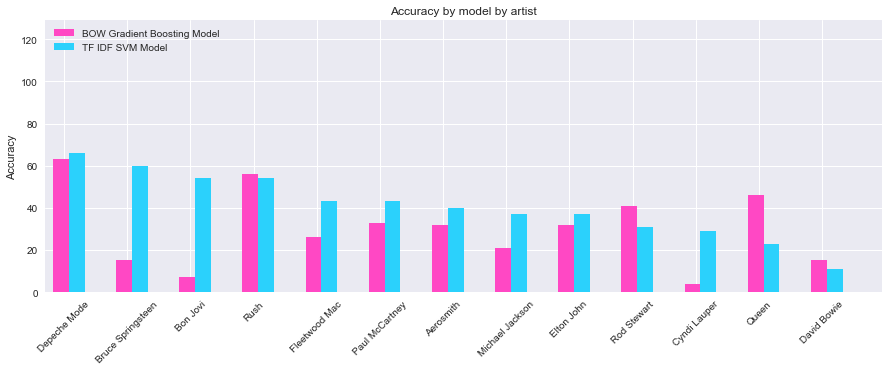

In [178]:
# create bar graph of table above
def model_compare_graph():
    # Setting the positions and width for the bars
    pos = list(range(len(model_compare['gb_pct_correct']))) 
    width = 0.25 

    # Plotting the bars
    fig, ax = plt.subplots(figsize=(15,5))

    # Create a bar with GB data,
    # in position pos,
    plt.bar(pos, 
            
            model_compare['gb_pct_correct'], 
            width, 
            color='#ff48c4', 
            label=model_compare['artist'][0]) 

    # Create a bar with SVM data,
    # in position pos + some width buffer,
    plt.bar([p + width for p in pos], 
            
            model_compare['svm_pct_correct'],
            width, 
            color='#2bd1fc', 
            label=model_compare['artist'][1]) 


    # Set the y axis label
    ax.set_ylabel('Accuracy')

    # Set the chart's title
    ax.set_title('Accuracy by model by artist')

    # Set the position of the x ticks
    ax.set_xticks([p +  width/5 for p in pos])
    plt.xticks(rotation=45)

    # Set the labels for the x ticks
    ax.set_xticklabels(model_compare['artist'])

    # Setting the x-axis and y-axis limits
    plt.xlim(min(pos)-width, max(pos)+width*4)
    plt.ylim([0, max(model_compare['gb_pct_correct'] + model_compare['svm_pct_correct'] )] )

    # Adding the legend and showing the plot
    plt.legend(['BOW Gradient Boosting Model', 'TF IDF SVM Model'], loc='upper left')
    plt.show()

model_compare_graph()

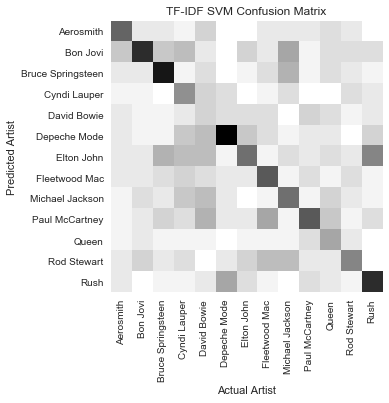

In [221]:

def TFIDF_SVM_heatmap():
    conf = sklearn.metrics.confusion_matrix(pred, y_test)
    y = eighties_artists['artist'].sort_values()
    fig, ax = plt.subplots(figsize=(10,5))
    plt.imshow(conf, cmap='binary', interpolation='None')
    ax.set_ylabel('Predicted Artist')
    ax.set_xlabel('Actual Artist')
    ax.grid(color='w', linestyle='-', linewidth=0)
    z = model_compare['artist']
    ax.set_xticks(np.arange(len(z)))
    ax.set_yticks(np.arange(len(z)))
    ax.set_xticklabels(y)
    plt.xticks(rotation=90)
    ax.set_yticklabels(y)
    plt.title('TF-IDF SVM Confusion Matrix')
    plt.show()
    
BOW_GB_heatmap()


In [ ]:
# Naive Bayes - not good

In [ ]:
# Random Forest - not as good as SVM